# Making Charts with Pandas

## Line chart

In [68]:
import pandas as pd
user_df = pd.read_csv("https://raw.githubusercontent.com/p4css/py4css/main/data/twitter_user1_hashed.csv")
user_df['account_creation_date'] = pd.to_datetime(user_df['account_creation_date'], format="%Y-%m-%d")
user_df['account_creation_ym'] = user_df['account_creation_date'].dt.to_period("M")

In [69]:
sum_df = user_df.groupby('account_creation_ym')['userid'].count().reset_index(name='n')
print(type(sum_df))
sum_df

<class 'pandas.core.frame.DataFrame'>


account_creation_ym   n
0               2008-05   1
1               2008-07   1
2               2008-11   1
3               2009-01   1
4               2009-02   1
..                  ...  ..
98              2019-01   8
99              2019-02  12
100             2019-03   4
101             2019-04   4
102             2019-05  12

[103 rows x 2 columns]

In [70]:
month_count = user_df['account_creation_ym'].value_counts().reset_index(name='n')
month_count = month_count.sort_values('index', ascending=True)

<AxesSubplot:xlabel='index'>

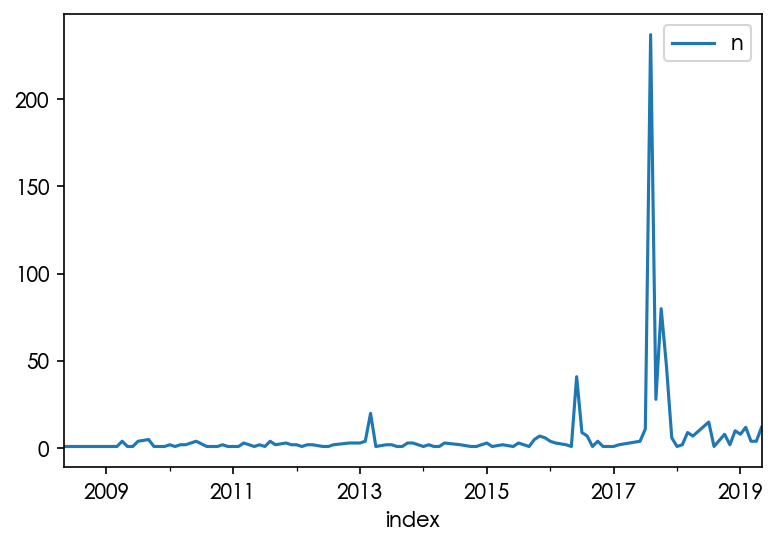

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
month_count.plot(x = 'index', y = 'n')

<AxesSubplot:xlabel='index'>

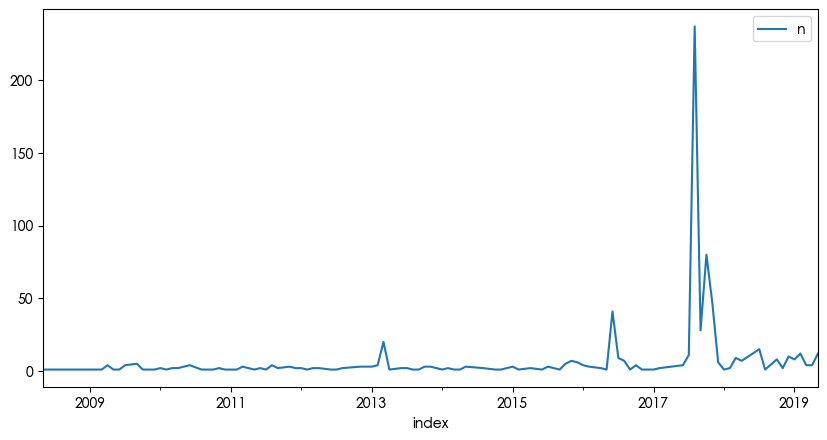

In [77]:
plt.rcParams['figure.dpi'] = 100
month_count.plot(x = 'index', y = 'n', figsize=(10, 5))

### Plot resolution

* https://stackoverflow.com/questions/39870642/matplotlib-how-to-plot-a-high-resolution-graph
* Best result: `plt.savefig('filename.pdf')`
* To png: `plt.savefig('filename.png', dpi=300)`

Adjust resolution
* For saving the graph: `matplotlib.rcParams['savefig.dpi'] = 300`
* For displaying the graph when you use plt.show(): `matplotlib.rcParams["figure.dpi"] = 100`

<AxesSubplot:xlabel='index'>

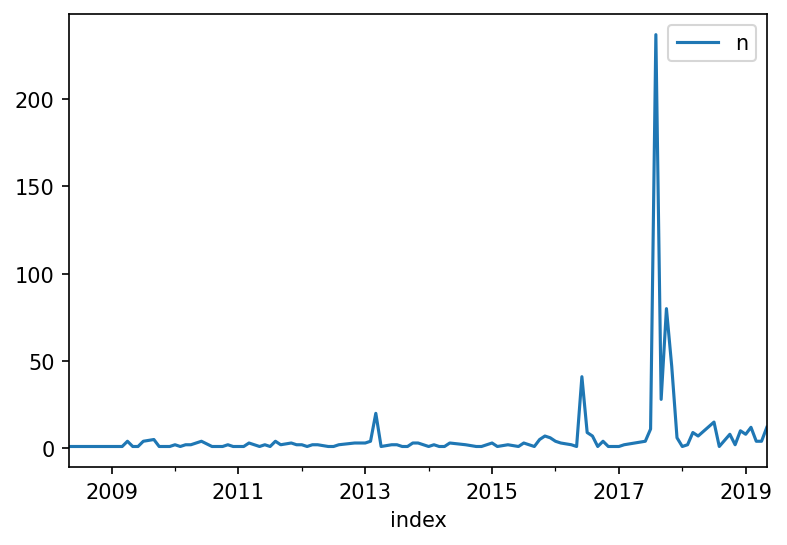

In [63]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
month_count.plot(x = 'index', y = 'n')
# plt.savefig("fig.pdf")

## Bar chart

In [42]:
lang_count = user_df['account_language'].value_counts().reset_index(name="n").sort_values('n', ascending=False).rename(columns={"index":"account_language"})
lang_count

account_language    n
0            zh-cn  569
1               en  104
2               ru   36
3            zh-CN   13
4            zh-tw   10
5               es    8
6            en-gb    3
7               ja    1

<AxesSubplot:xlabel='account_language'>

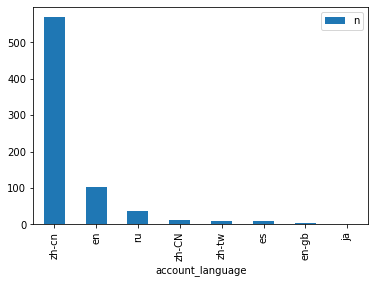

In [46]:
lang_count.plot(kind="bar", x="account_language")

### Coordinate-flip

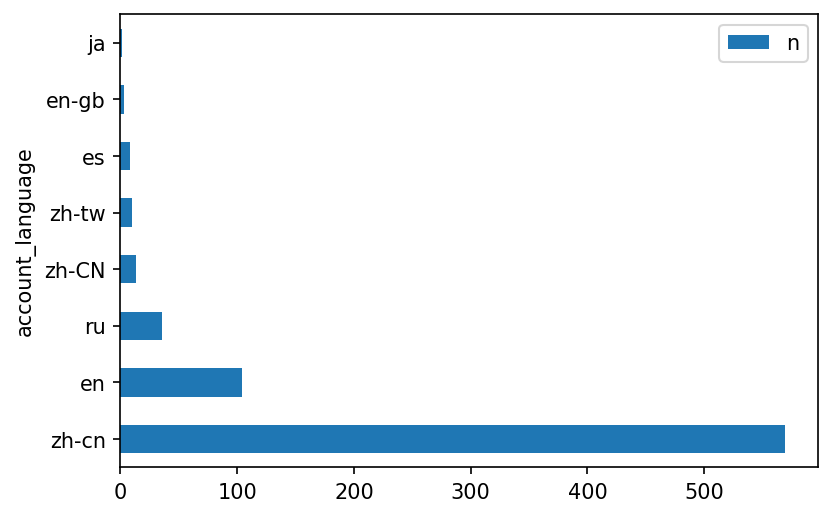

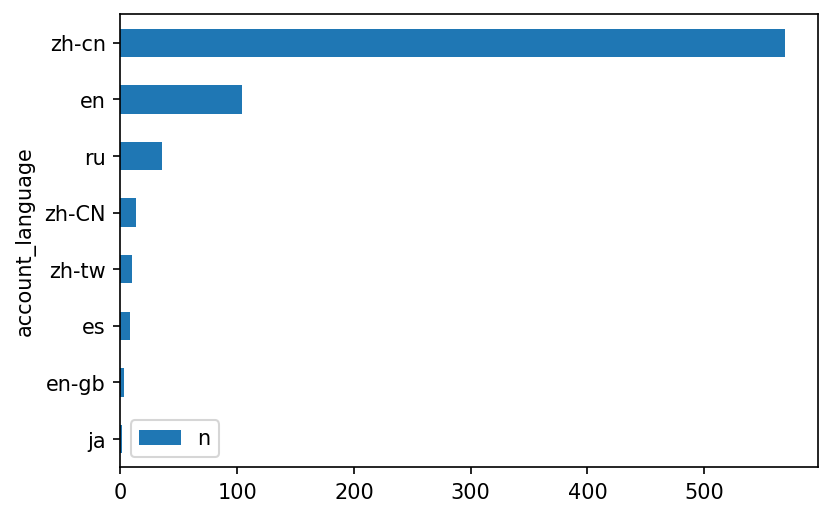

In [64]:
lang_count.plot(kind="barh", x="account_language")
lang_count.plot.barh(x="account_language").invert_yaxis()

plt.show()

## Plot with Chinese font

In [65]:
import pandas as pd
drug_df = pd.read_csv('https://raw.githubusercontent.com/p4css/py4css/main/data/drug_156_2.csv')
pat1 = '‰ª£Ë≥º|Â∏∂Âõû'
pat2 = 'Ëù¶ÁöÆ|Èú≤Â§©|ÊãçË≥£|YAHOO|ÂïÜÂ∫óË°ó'
filtered_drug_df = drug_df.loc[drug_df['ÈÅïË¶èÁî¢ÂìÅÂêçÁ®±'].str.contains(pat=pat1, na=False) & 
                               drug_df['ÂàäÊí≠Â™íÈ´î'].str.contains(pat=pat2, na=False)]
filtered_drug_df

ÈÅïË¶èÁî¢ÂìÅÂêçÁ®± ÈÅïË¶èÂª†ÂïÜÂêçÁ®±ÊàñË≤†Ë≤¨‰∫∫ ËôïÂàÜÊ©üÈóú  \
2                                    ‚úàÊó•Êú¨ ‰ª£Ë≥º ÂèÉÂ§©Ë£ΩËó• ËôïÊñπÁ∞ΩÈªûÁúºÊ∂≤    ËòáOÊ∂µ/ËòáOÊ∂µ  NaN   
3                              ‚úàÊó•Êú¨ ‰ª£Ë≥º TSUMURA ‰∏≠Â∞áÊπØ 24Â§©ÂåÖË£ù    ËòáOÊ∂µ/ËòáOÊ∂µ  NaN   
4                                 _Salty.shop Êó•Êú¨‰ª£Ë≥º Ê®ÇÊï¶Â∞èËä±    ÊõæOÂ´∫/ÊõæOÂ´∫  NaN   
9     ÁèæË≤®Ê≠£ÂìÅ Eve Âø´ÈÄüÂá∫Ë≤® Êó•Êú¨‰ª£Ë≥º ÁôΩÂÖî60 ËóçÂÖî 40 eve ÈáëÂÖî EVE ÂÖîÂ≠ê Â®ÉÂ®É...    ÂºµOÊÅ©/ÂºµOÊÅ©  NaN   
18                            [Êµ∑Â§ñ‰ª£Ë≥º]Á∫àËçâÊ†πËÜ†Âõä-120ÊØ´ÂÖã-240Á≤í-Áù°Áú†    Ê±üOÂêõ/Ê±üOÂêõ  NaN   
...                                                 ...        ...  ...   
2947                      „ÄåÊ≥∞Âúã‰ª£Ë≥ºüáπüá≠„ÄçÊ≥∞Âúãüáπüá≠HirudoidÂº∑ÊïàÂéªÁñ§ËÜèÔºàÈ†êË≥ºÔºâ    È≠èOËäù/È≠èOËäù  NaN   
2948              eBuyÁæéÂúã‰ª£Ë≥ºÁæéÂõΩÊ≠£ÂìÅGNCÈì∂ÊùèÂè∂Á≤æÂçéÊèêÈ´òÂ¢ûÂº∫ËÆ∞ÂøÜÂäõÈ¢ÑÈò≤ËÄÅÂπ¥Áó¥ÂëÜË°•ËÑëÂÅ•ËÑë    Ëï≠OÈõÑ/Ëï≠OÈõÑ  NaN   
2957  „ÄêÁèæË≤®„ÄëH&H ‰πÖÂÖâ HisamitsuÈÖ∏ÁóõËàíÁ∑©Ë≤ºÂ∏É 120Êûö 140Êûö Áó†Áóõ ËàíÁ∑© Ë≤ºÂ∏É ...    ËÉ°OO/ËÉ°OO  NaN   
2965                              ÁæéÂúã‰ª£Ë≥º Ôºå9:5%ÊäòÊâ£ËêΩÂª∫È´ÆÊ¥óÔºåÂÖ©Ê¨æÈÉΩÊúâ    Èô≥OÈµ¨/Èô≥OÈµ¨  NaN   
2969                                        Êó•Êú¨Â∏∂ÂõûÊ®ÇÊï¶Â∞èËä±Êñ∞ÈÆÆË≤®    ÂºµOËêç/ÂºµOËêç  NaN   

                    ËôïÂàÜÊó•Êúü     ËôïÂàÜÊ≥ïÊ¢ù       ÈÅïË¶èÊÉÖÁØÄ                ÂàäÊí≠Êó•Êúü ÂàäÊí≠Â™íÈ´îÈ°ûÂà•  \
2     01 25 2022 12:00AM      NaN       ÁÑ°ÁÖßËó•ÂïÜ  08 27 2021 12:00AM     Á∂≤Ë∑Ø   
3     01 25 2022 12:00AM      NaN       ÁÑ°ÁÖßËó•ÂïÜ  08 27 2021 12:00AM     Á∂≤Ë∑Ø   
4     02 17 2022 12:00AM  Ëó•‰∫ãÊ≥ïÁ¨¨27Ê¢ù       ÁÑ°ÁÖßËó•ÂïÜ   12 6 2021 12:00AM     Á∂≤Ë∑Ø   
9      03 4 2022 12:00AM      NaN       ÁÑ°ÁÖßËó•ÂïÜ  12 21 2021 12:00AM     Á∂≤Ë∑Ø   
18    03 15 2022 12:00AM      NaN       ÁÑ°ÁÖßËó•ÂïÜ   08 2 2021 12:00AM     Á∂≤Ë∑Ø   
...                  ...      ...        ...                 ...    ...   
2947   06 5 2020 12:00AM  Ëó•‰∫ãÊ≥ïÁ¨¨27Ê¢ù       ÁÑ°ÁÖßËó•ÂïÜ  12 17 2019 12:00AM     Á∂≤Ë∑Ø   
2948                 NaN      NaN       ÁÑ°ÁÖßËó•ÂïÜ   03 9 2020 12:00AM     Á∂≤Ë∑Ø   
2957  07 16 2020 12:00AM  Ëó•‰∫ãÊ≥ïÁ¨¨27Ê¢ù       ÁÑ°ÁÖßËó•ÂïÜ  02 27 2020 12:00AM     Á∂≤Ë∑Ø   
2965  07 16 2020 12:00AM      NaN  Ëó•ÂìÅÊú™Áî≥Ë´ãÊü•È©óÁôªË®ò  04 16 2020 12:00AM     Á∂≤Ë∑Ø   
2969  06 23 2020 12:00AM      NaN   Èõ£‰ª•Âà§ÂÆöÁî¢ÂìÅÂ±¨ÊÄß  03 10 2020 12:00AM     Á∂≤Ë∑Ø   

            ÂàäÊí≠Â™íÈ´î  Êü•ËôïÊÉÖÂΩ¢  
2           Ëù¶ÁöÆË≥ºÁâ©   NaN  
3           Ëù¶ÁöÆË≥ºÁâ©  ËºîÂ∞éÁµêÊ°à  
4           Ëù¶ÁöÆË≥ºÁâ©  ËôïÂàÜÁµêÊ°à  
9         Ëù¶ÁöÆÊãçË≥£Á∂≤Á´ô  ËºîÂ∞éÁµêÊ°à  
18          Ëù¶ÁöÆË≥ºÁâ©   NaN  
...          ...   ...  
2947        Ëù¶ÁöÆË≥ºÁâ©  ËôïÂàÜÁµêÊ°à  
2948        Ëù¶ÁöÆË≥ºÁâ©   NaN  
2957        Ëù¶ÁöÆË≥ºÁâ©  ËôïÂàÜÁµêÊ°à  
2965  Ê®ÇË≥ºËù¶ÁöÆËÇ°‰ªΩÊúâÈôêÂÖ¨Âè∏  ËºîÂ∞éÁµêÊ°à  
2969        Ëù¶ÁöÆË≥ºÁâ©  ËºîÂ∞éÁµêÊ°à  

[420 rows x 10 columns]

In [66]:
media_count = filtered_drug_df['ÂàäÊí≠Â™íÈ´î'].value_counts().reset_index(name = "n").rename(columns={"index": "media"})

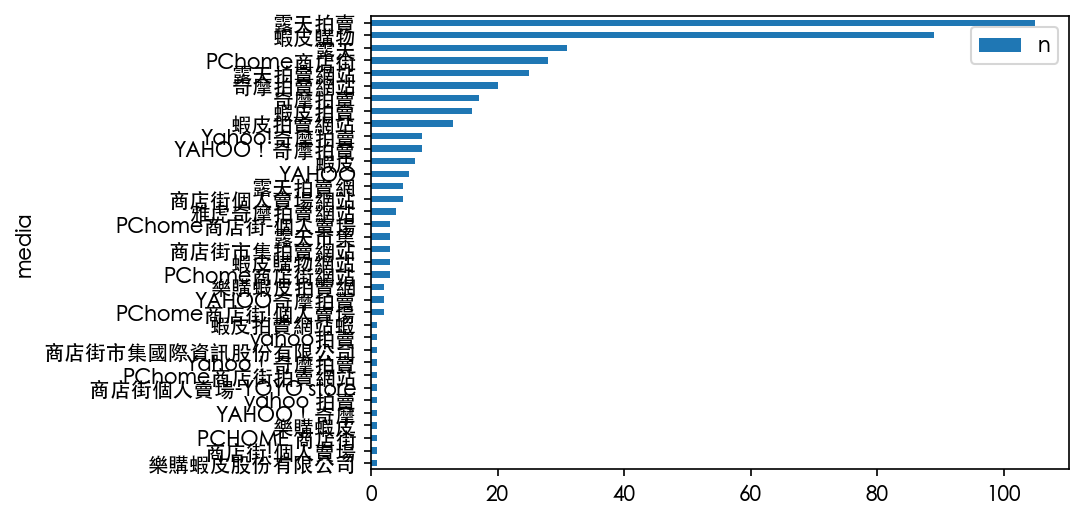

In [67]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = ['Heiti TC']

media_count.plot.barh(x="media").invert_yaxis()

# plt.show()